# Access the Tools located in TextbookSimulations

In [1]:
using TextbookSimulations

# Solve a Power-Flow Problem using PowerModels.jl

Read in data from a MATPOWER case file, solve the AC power-flow study using Los Alamos National Laboratory's (LANL's) `PowerModels.jl`, and present the resulting bus- and line-level solutions. The data in this example is from the University of Washington's (UW's) EE 454 course (Power System Analysis) and describes a twelve-bus test system.

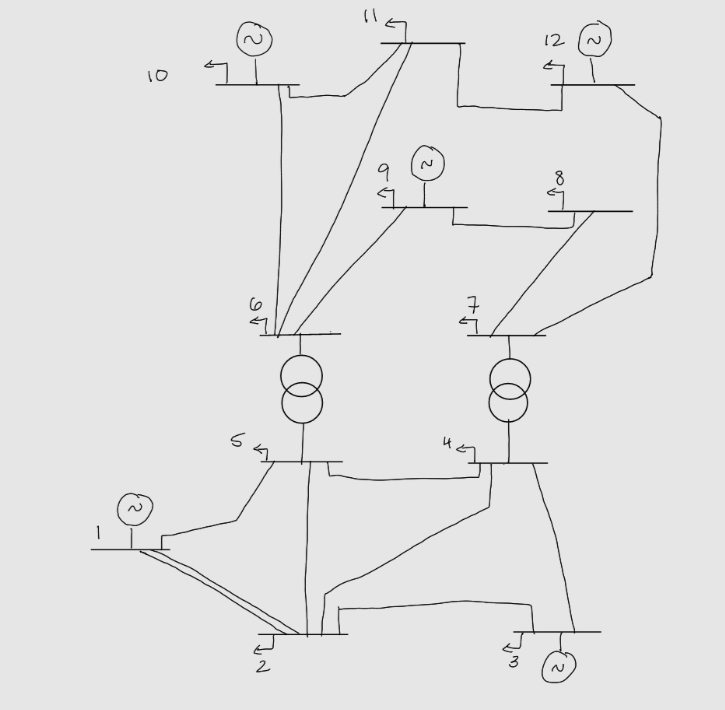

In [2]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "uw_ee_454_project_data_modified"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "uw_ee_454_project_data_modified"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.05811,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [3]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.458292

In [4]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.04,0.0,106.36,7.26011,0.0,0.0
2,2,PQ,1.02354,-2.29928,0.0,0.0,20.1,12.5
3,3,PV,1.025,-3.12535,42.0,13.2755,45.2,16.0
4,4,PQ,1.00377,-4.32592,0.0,0.0,60.8,10.9
5,5,PQ,1.01257,-3.36874,0.0,0.0,7.6,-1.6
6,6,PQ,1.0095,-4.0492,0.0,0.0,13.5,8.5
7,7,PQ,0.993515,-6.67027,0.0,0.0,33.5,11.6
8,8,PQ,0.997421,-6.21869,0.0,0.0,9.0,5.8
9,9,PV,1.02,-4.36466,23.0,9.51487,4.3,2.1


In [5]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,74.1673,-73.1751,0.992253,3.22563,-5.81733,-2.5917
2,1,5,32.1927,-31.6726,0.520105,4.03449,-7.18783,-3.15335
3,2,3,7.07601,-7.05102,0.0249933,-4.67186,0.181951,-4.48991
4,2,4,22.1079,-21.8253,0.282615,2.77486,-5.41118,-2.63632
5,2,5,23.8912,-23.5761,0.315088,-4.78568,1.60824,-3.17744
6,3,4,3.85102,-3.72459,0.126424,-2.90649,1.62152,-1.28497
7,4,5,-42.5847,42.8317,0.247038,-9.11152,5.91651,-3.19501
8,4,7,7.33456,-7.33456,0.0,2.00118,-1.68211,0.319063
9,5,6,4.81694,-4.81694,0.0,1.26309,-1.20213,0.0609543


# Contingency Case 1 for UW's EE 454 Project

Read in data from a MATPOWER case file, change the impedance of one line, solve the AC power-flow study using LANL's `PowerModels.jl`, and present the resulting bus- and line-level solutions. The data in this example is from UW's EE 454 course (Power System Analysis) and describes a twelve-bus test system. Contingency Case 1 describes a scenario where the line between Buses 10 and 11 is taken out of service and the load at Bus 11 is increased.

In [6]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "uw_ee_454_project_data_modified"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "uw_ee_454_project_data_modified"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.05811,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [7]:
# Delete the line between Buses 10 and 11 to appropriately reflect the contingency
delete_line!(10,11, network_data)

Bus 10 is not stranded.
Bus 11 is not stranded.


In [8]:
#increase active and reactive load on bus 11 from 13.5 MW and 5.8 MVAr
change_bus_real_power_demand!(60, 11, network_data)
change_bus_reactive_power_demand!(25, 11, network_data)

0.25

In [9]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.00157404

In [10]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.04,0.0,158.442,13.7956,0.0,0.0
2,2,PQ,1.01734,-3.38376,0.0,0.0,20.1,12.5
3,3,PV,1.025,-4.6052,42.0,16.3526,45.2,16.0
4,4,PQ,0.988023,-6.39683,0.0,0.0,60.8,10.9
5,5,PQ,0.99614,-5.33185,0.0,0.0,7.6,-1.6
6,6,PQ,0.990955,-11.0615,0.0,0.0,13.5,8.5
7,7,PQ,0.996965,-13.5015,0.0,0.0,33.5,11.6
8,8,PQ,0.999958,-13.1636,0.0,0.0,9.0,5.8
9,9,PV,1.02,-11.5591,23.0,17.4982,4.3,2.1


In [11]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,108.018,-105.917,2.10087,4.70439,-3.87793,0.82646
2,1,5,50.4248,-49.1352,1.28957,9.09116,-9.16056,-0.0694005
3,2,3,9.77222,-9.71178,0.0604407,-8.40086,4.088,-4.31286
4,2,4,32.2932,-31.6797,0.613525,5.30357,-6.86099,-1.55742
5,2,5,43.7513,-42.6904,1.06094,-5.52478,3.39392,-2.13086
6,3,4,6.51178,-6.18149,0.330294,-3.73545,2.52259,-1.21286
7,4,5,-44.8437,45.1214,0.277688,-6.33299,3.36052,-2.97247
8,4,7,21.9049,-21.9049,0.0,-0.228599,2.96267,2.73407
9,5,6,39.1042,-39.1042,0.0,4.00612,-0.0817,3.92442


Within the bus-level results, it can be seen that increasing the load at bus 11 and then disconnecting a line has caused an undervoltage problem at this bus. The voltage at bus 11 is 0.948 per unit, which is below the minimum of 0.95 per unit. 

In order to fix the undervoltage issue, a capacitor bank is added at bus 11. The capacitor bank compensates for the increased reactive power, which in turn increases the voltage at the bus. The capacitor bank is modeled as a decrease to the reactive power demand at bus 11 from 20 MVAR to 10 MVAR.

In [12]:
#add a capacitor bank at bus 11 to help compensate for increased load and disconnected line
change_bus_reactive_power_demand!(10, 11, network_data)

0.1

In [13]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.001683

In [14]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.04,0.0,157.898,11.7425,0.0,0.0
2,2,PQ,1.01811,-3.37689,0.0,0.0,20.1,12.5
3,3,PV,1.025,-4.56524,42.0,15.7568,45.2,16.0
4,4,PQ,0.989537,-6.39255,0.0,0.0,60.8,10.9
5,5,PQ,0.997889,-5.34504,0.0,0.0,7.6,-1.6
6,6,PQ,0.99927,-11.0294,0.0,0.0,13.5,8.5
7,7,PQ,0.997058,-13.3019,0.0,0.0,33.5,11.6
8,8,PQ,1.00001,-12.9525,0.0,0.0,9.0,5.8
9,9,PV,1.02,-11.3218,23.0,13.2096,4.3,2.1


In [15]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,107.497,-105.419,2.07781,3.52626,-2.77428,0.751983
2,1,5,50.401,-49.1221,1.27889,8.21619,-8.33584,-0.119652
3,2,3,9.57783,-9.52149,0.0563453,-7.97577,3.64226,-4.3335
4,2,4,32.2535,-31.6454,0.608046,4.89501,-6.47678,-1.58177
5,2,5,43.4877,-42.4357,1.052,-6.64497,4.49378,-2.15118
6,3,4,6.32149,-6.00076,0.320723,-3.88546,2.66824,-1.21722
7,4,5,-44.4942,44.7677,0.273497,-7.04179,4.04342,-2.99837
8,4,7,21.3404,-21.3404,0.0,-0.0496698,2.63644,2.58677
9,5,6,39.1901,-39.1901,0.0,1.39863,2.4934,3.89203


Looking at the bus-level results, it can be seen that the undervoltage problem at bus 11 has been fixed by adding a capacitor bank. However, within the line-level results, it can be seen that the flow limits on the lines from bus 1 to bus 2 have been violated. The active power flowing from bus 1 to bus 2 is 108.018 MW, which is higher than the limit of 95 MW. . This issue exists because the line that connects bus 11 to generation is disconnected. 

To help with this issue, the active power generation at bus 10 is increased from 27 MW to 50 MW so that there is more power being provided to the part of the system around busses 10 and 11. This increase in generation means the slack bus, or bus 1, does not have to generate as much power and the power flowing from bus 1 to bus 2 should also decrease to within limits.

In [16]:
#increase generation at bus 10 to help with line over-flow
change_bus_real_power_generation!(50, 10, network_data)

0.5

In [17]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.00147796

In [18]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.04,0.0,135.609,11.4132,0.0,0.0
2,2,PQ,1.01984,-2.90756,0.0,0.0,20.1,12.5
3,3,PV,1.025,-3.96689,42.0,15.1488,45.2,16.0
4,4,PQ,0.994401,-5.50021,0.0,0.0,60.8,10.9
5,5,PQ,1.00283,-4.44759,0.0,0.0,7.6,-1.6
6,6,PQ,0.994212,-7.72952,0.0,0.0,13.5,8.5
7,7,PQ,0.996361,-11.0075,0.0,0.0,33.5,11.6
8,8,PQ,0.999373,-10.5102,0.0,0.0,9.0,5.8
9,9,PV,1.02,-8.54595,23.0,16.4236,4.3,2.1


In [19]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,93.2803,-91.712,1.56834,4.33606,-5.14889,-0.812835
2,1,5,42.3286,-41.4211,0.907513,7.07719,-8.67043,-1.59324
3,2,3,8.66425,-8.62067,0.0435803,-6.90278,2.50776,-4.39502
4,2,4,28.0174,-27.5583,0.45915,4.30034,-6.3563,-2.05596
5,2,5,34.9303,-34.2574,0.672853,-4.74867,2.08241,-2.66626
6,3,4,5.42067,-5.18723,0.233447,-3.35896,2.11329,-1.24567
7,4,5,-45.151,45.4299,0.278873,-7.12886,4.10926,-3.0196
8,4,7,17.0965,-17.0965,0.0,0.471877,1.1734,1.64528
9,5,6,22.6486,-22.6486,0.0,4.07877,-2.7516,1.32716


# Contingency Case 2 for UW's EE 454 Project

Read in data from a MATPOWER case file, remove a line, solve the AC power-flow study using LANL's `PowerModels.jl`, and present the resulting bus- and line-level solutions. The data in this example is from UW's EE 454 course (Power System Analysis) and describes a twelve-bus test system. Contingency Case 2 describes a scenario where a generator at bus 3 is removed to check N-1 security. This contingecy can be easily modified to check N-1 security through other means, such as removing every line or every generator to check stability.

In [20]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "uw_ee_454_project_data_modified"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "uw_ee_454_project_data_modified"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.05811,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [21]:
# Reduce the active generation at bus 3 to zero
change_bus_real_power_generation!(0, 3, network_data)

0.0

In [22]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.00145316

In [23]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.04,0.0,151.122,-4.81119,0.0,0.0
2,2,PQ,1.02304,-3.52658,0.0,0.0,20.1,12.5
3,3,PV,1.025,-8.8279,0.0,35.9965,45.2,16.0
4,4,PQ,1.00927,-5.57264,0.0,0.0,60.8,10.9
5,5,PQ,1.01569,-4.46793,0.0,0.0,7.6,-1.6
6,6,PQ,1.0103,-5.1745,0.0,0.0,13.5,8.5
7,7,PQ,0.994528,-7.83658,0.0,0.0,33.5,11.6
8,8,PQ,0.998119,-7.37182,0.0,0.0,9.0,5.8
9,9,PV,1.02,-5.48569,23.0,8.74804,4.3,2.1


In [24]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,109.717,-107.558,2.15823,-5.5718,6.54273,0.970932
2,1,5,41.4049,-40.5746,0.830322,0.760606,-2.71894,-1.95833
3,2,3,46.6103,-45.5917,1.01863,-12.104,11.8025,-0.301406
4,2,4,21.3443,-21.0904,0.253923,-0.454172,-2.28627,-2.74044
5,2,5,19.5037,-19.2848,0.218875,-6.48461,3.1732,-3.31141
6,3,4,0.391714,0.110665,0.502379,8.19398,-9.39008,-1.1961
7,4,5,-46.9495,47.2383,0.288885,-2.04029,-1.05674,-3.09703
8,4,7,7.12916,-7.12916,0.0,2.81665,-2.49582,0.320825
9,5,6,5.02111,-5.02111,0.0,2.20248,-2.12904,0.0734403
